[nltk_data] Downloading package words to
[nltk_data]     C:\Users\MIG1-\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MIG1-\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MIG1-\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
before __name__ == "main"
Numero de instancias: 5000
class=male Avg Text Length: 2657.031058438905 Word Count: 895179
class=female Avg Text Length: 3036.07794751273 Word Count: 1066039
este es el clf --> MultinomialNB()
female confussion matrix:  [[134, 105], [134, 127]] male confussion matrix:  [[127, 134], [105, 134]] female accurary and recall:  (0.5606694560669456, 0.5) male accuracy and recall:  (0.48659003831417624, 0.5474137931034483)
este es el clf --> DecisionTreeClassifier(max_depth=10)


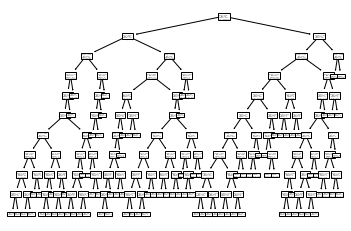

female confussion matrix:  [[205, 156], [63, 76]] male confussion matrix:  [[76, 63], [156, 205]] female accurary and recall:  (0.5678670360110804, 0.7649253731343284) male accuracy and recall:  (0.5467625899280576, 0.3275862068965517)
este es el clf --> RandomForestClassifier(max_depth=10)
female confussion matrix:  [[200, 140], [68, 92]] male confussion matrix:  [[92, 68], [140, 200]] female accurary and recall:  (0.5882352941176471, 0.746268656716418) male accuracy and recall:  (0.575, 0.39655172413793105)


In [1]:
from description import data_base
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from math import floor
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd


training_rate = 0.9


feature_matrix,class_list = data_base.get_feature_matrix(),data_base.get_class_list()

classifier_methods = [
    MultinomialNB
    ,lambda:DecisionTreeClassifier(max_depth=10)
    ,lambda:RandomForestClassifier(max_depth=10)
    #,lambda:MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1,max_iter=500)
]

plotting_fs = [lambda clf: None,lambda clf:tree.plot_tree(clf),lambda clf: None,lambda clf: None]

for classifier_method,plotting_f in zip(classifier_methods,plotting_fs):
    clf = classifier_method()
    print('este es el clf -->',clf)
    training_length = floor(len(feature_matrix) * training_rate)

    clf.fit(feature_matrix[0:training_length],class_list[0:training_length])

    plotting_f(clf)
    plt.show()

    #confussion_matrix_female,confussion_matrix_male = [[0]*2]*2,[[0]*2]*2
    confussion_matrix_female,confussion_matrix_male = [[0,0],[0,0]],[[0,0],[0,0]]
    genre_to_index ={'female':0,'male':1}
    def get_accuracy_and_recall(confussion_matrix):
        return confussion_matrix[0][0]/(confussion_matrix[0][0]+confussion_matrix[0][1]),confussion_matrix[0][0]/(confussion_matrix[0][0]+confussion_matrix[1][0])
    for predicted_class,real_class in zip(clf.predict(feature_matrix[training_length:]),class_list[training_length:]):

        pI,rI = genre_to_index[predicted_class],genre_to_index[real_class]
        confussion_matrix_female[pI][rI]+=1
        confussion_matrix_male[1-pI][1-rI]+=1
   

    female_accuracy_and_recall,male_accuracy_and_recall = get_accuracy_and_recall(confussion_matrix_female),get_accuracy_and_recall(confussion_matrix_male)
    print('female confussion matrix: ',confussion_matrix_female, 'male confussion matrix: ',confussion_matrix_male,'female accurary and recall: ',female_accuracy_and_recall,'male accuracy and recall: ',male_accuracy_and_recall)
    save_confussion_matrix = [
        [''             , 'Female '                       ,       ''                     ],
        [''             , 'Relevante '                    , 'No relevante'               ],
        ['Recuperada'   ,   confussion_matrix_female[0][0],confussion_matrix_female[0][1]],
        ['No recuperada',   confussion_matrix_female[1][0],confussion_matrix_female[1][1]],
        [''             , 'Male '                         ,       ''                     ],
        [''             , 'Relevante '                    , 'No relevante'               ],
        ['Recuperada'   ,   confussion_matrix_male[0][0]  ,confussion_matrix_male[0][1]  ],
        ['No recuperada',   confussion_matrix_male[1][0]  ,confussion_matrix_male[1][1]  ]
    ]
    pd.DataFrame(data = save_confussion_matrix).to_csv("ConfusionMatrix"+str(clf).split("(")[0]+".csv", index = False, header=False)


#print(normalizedLines)